# **Khai báo thư viện**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# **Tải dữ liệu**

In [ ]:
dataframe = pd.read_csv("DIS.csv")
print(dataframe)

           Date        Open        High  ...       Close   Adj Close    Volume
0    2021-01-05  176.199997  180.339996  ...  178.440002  178.440002   7771800
1    2021-01-06  178.320007  181.610001  ...  179.119995  179.119995   7517800
2    2021-01-07  179.500000  179.949997  ...  178.580002  178.580002   7300800
3    2021-01-08  178.809998  180.020004  ...  178.690002  178.690002   7894500
4    2021-01-11  177.750000  181.259995  ...  179.089996  179.089996   6461300
..          ...         ...         ...  ...         ...         ...       ...
248  2021-12-29  154.559998  155.919998  ...  154.869995  154.869995   8737000
249  2021-12-30  155.710007  157.070007  ...  155.929993  155.929993   7228400
250  2021-12-31  155.869995  156.570007  ...  154.889999  154.889999   6406000
251  2022-01-03  155.830002  157.559998  ...  156.759995  156.759995  10222800
252  2022-01-04  158.589996  160.320007  ...  155.729996  155.729996  15221086

[253 rows x 7 columns]


Lưu dữ liệu ngày

In [ ]:
date = pd.to_datetime(dataframe['Date'])
date[:5]

0   2021-01-05
1   2021-01-06
2   2021-01-07
3   2021-01-08
4   2021-01-11
Name: Date, dtype: datetime64[ns]

Lưu dữ liệu Giá đóng cửa

In [ ]:
data = list(dataframe)[4]
data = dataframe[data].astype(float)
data[:5]

0    178.440002
1    179.119995
2    178.580002
3    178.690002
4    179.089996
Name: Close, dtype: float64

# **Vẽ biểu đồ Giá đóng cửa**

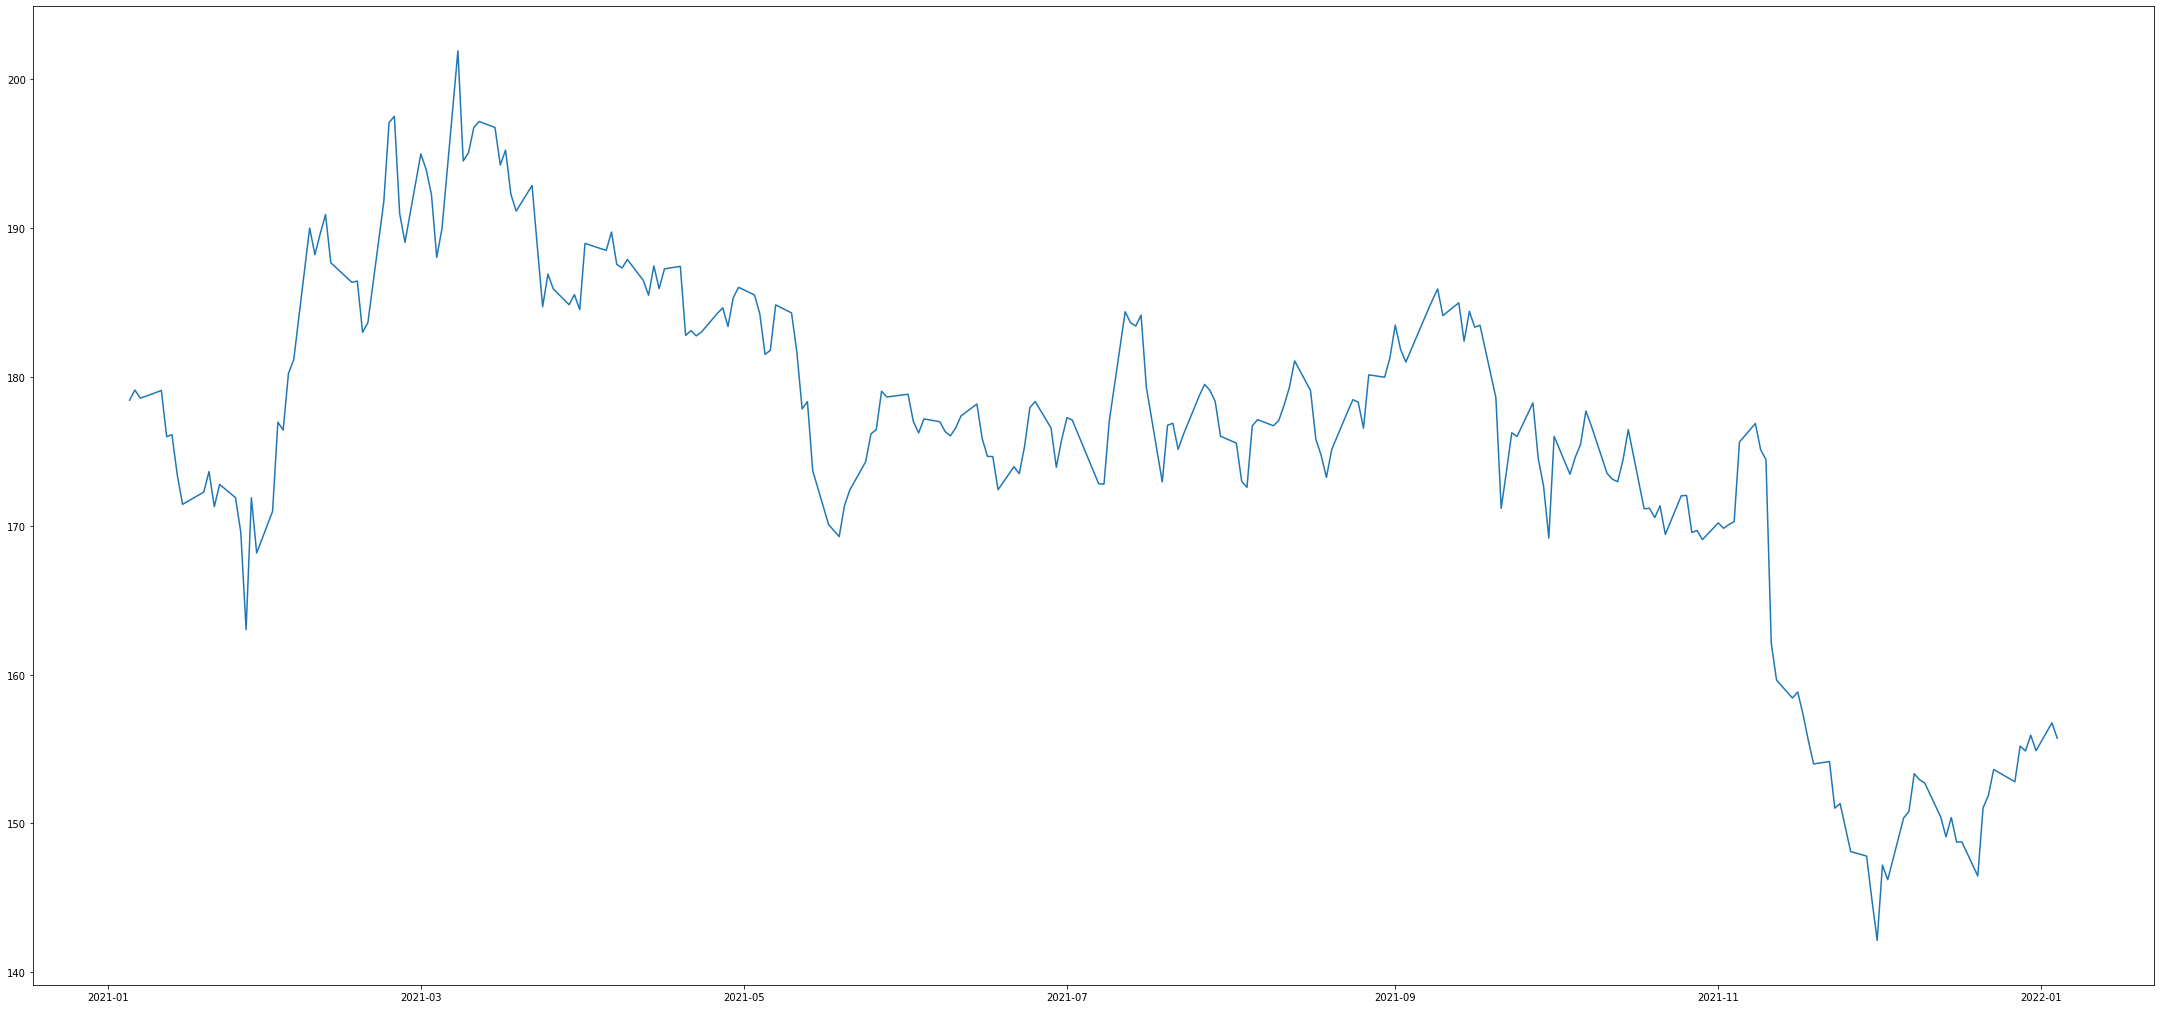

In [ ]:
plt.figure(figsize=(38,18))
plt.plot(date, data, linestyle = 'solid')
plt.show()

# **Tiền xử lý dữ liệu**

Chuyển về dạng numpy

In [ ]:
data = np.array(data).reshape(-1,1)
print(data.shape)
print(data[:5])

(253, 1)
[[178.440002]
 [179.119995]
 [178.580002]
 [178.690002]
 [179.089996]]


Chuẩn hóa dữ liệu bằng MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
print(data.shape)
print(data[:5])

(253, 1)
[[0.60726242]
 [0.61864114]
 [0.60960512]
 [0.61144581]
 [0.61813915]]


Chia tập train và tập test

Tập train 70% và tập test 30%

In [ ]:
train_size = int(len(data) * 0.70)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)+1]
len(train), len(test)

(177, 76)

Chia tập train và tập test thành X_train, y_train và X_test, y_test

Ví dụ:

Train = [120, 130, 125, 140, 134, 150]

back_price = 3

=> trainX ---> trainy

120 130 125 --->   140

130 125 140  ---> 134

125 140 134  ---> 150

In [ ]:
def data_prepare(data, back_price):
    X, y = [], []
    for i in range(len(data)-back_price-1):
        #Tìm giá cuối cùng
        end_price = i + back_price
        X.append(data[i:end_price, 0])
        y.append(data[end_price, 0])
    return np.array(X), np.array(y)

In [ ]:
back_price = 20
trainX, trainY = data_prepare(train, back_price)
testX, testY = data_prepare(test, back_price)
print(trainX.shape, trainY.shape)

(156, 20) (156,)


Reshape cho các tập train và test để phù hợp với đầu vào của LSTM

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

trainX.shape, testX.shape, trainY.shape, testY.shape

((156, 20, 1), (55, 20, 1), (156, 1), (55, 1))

# **Khai báo thư viện cho Mô hình LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# **Mô hình 1**

Có 2 lớp

units = 64

batch_size = 1

epochs = 100

In [ ]:
model1 = Sequential()
model1.add(LSTM(64,return_sequences= False, input_shape=(trainX.shape[1], trainX.shape[2])))
model1.add(Dense(trainY.shape[1]))
model1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history1 = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs = 100, batch_size=1, verbose=1)

Epoch 1/100
156/156 [==============================] - 3s 8ms/step - loss: 0.0244 - accuracy: 0.0064 - val_loss: 0.0212 - val_accuracy: 0.0182
Epoch 2/100
156/156 [==============================] - 1s 6ms/step - loss: 0.0069 - accuracy: 0.0064 - val_loss: 0.0257 - val_accuracy: 0.0182
Epoch 3/100
156/156 [==============================] - 1s 5ms/step - loss: 0.0063 - accuracy: 0.0064 - val_loss: 0.0207 - val_accuracy: 0.0182
Epoch 4/100
156/156 [==============================] - 1s 6ms/step - loss: 0.0057 - accuracy: 0.0064 - val_loss: 0.0156 - val_accuracy: 0.0182
Epoch 5/100
156/156 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.0064 - val_loss: 0.0162 - val_accuracy: 0.0182
Epoch 6/100
156/156 [==============================] - 1s 6ms/step - loss: 0.0045 - accuracy: 0.0064 - val_loss: 0.0120 - val_accuracy: 0.0182
Epoch 7/100
156/156 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 0.0064 - val_loss: 0.0140 - val_accuracy: 0.0182

Vẽ biểu đồ Accuracy

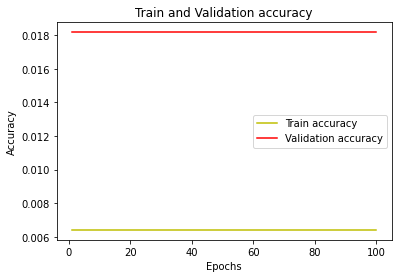

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Train accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Train and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Sử dụng mô hình để dự đoán

In [ ]:
prediction = model1.predict(testX)
print(prediction[:5])

[[0.5539752 ]
 [0.5899967 ]
 [0.50627166]
 [0.50998896]
 [0.49024576]]


Dùng inverse_transform để chuyển về giá trị gốc(giá trị trước khi scale)

In [ ]:
prediction_inverse = scaler.inverse_transform(prediction)
testY_inverse = scaler.inverse_transform(testY)
print(prediction_inverse[:5])
print(testY_inverse[:5])

[[175.25555]
 [177.4082 ]
 [172.4048 ]
 [172.62695]
 [171.4471 ]]
[[176.460007]
 [171.139999]
 [171.179993]
 [170.550003]
 [171.339996]]


Tính toán hiệu suất RMSE

Lỗi trung bình bình phương gốc (RMSE) là thước đo mức độ hiệu quả của mô hình. Nó thực hiện điều này bằng cách đo sự khác biệt giữa các giá trị dự đoán và giá trị thực tế. R-MSE càng nhỏ tức là sai số càng bé thì mức độ ước lượng cho thấy độ tin cậy của mô hình có thể đạt cao nhất.

In [ ]:
rmseScore = math.sqrt(mean_squared_error(testY_inverse, prediction_inverse[:,0]))
print('RMSE Score: %.2f RMSE' % (rmseScore))

RMSE Score: 4.09 RMSE


Vẽ biểu đồ dự đoán

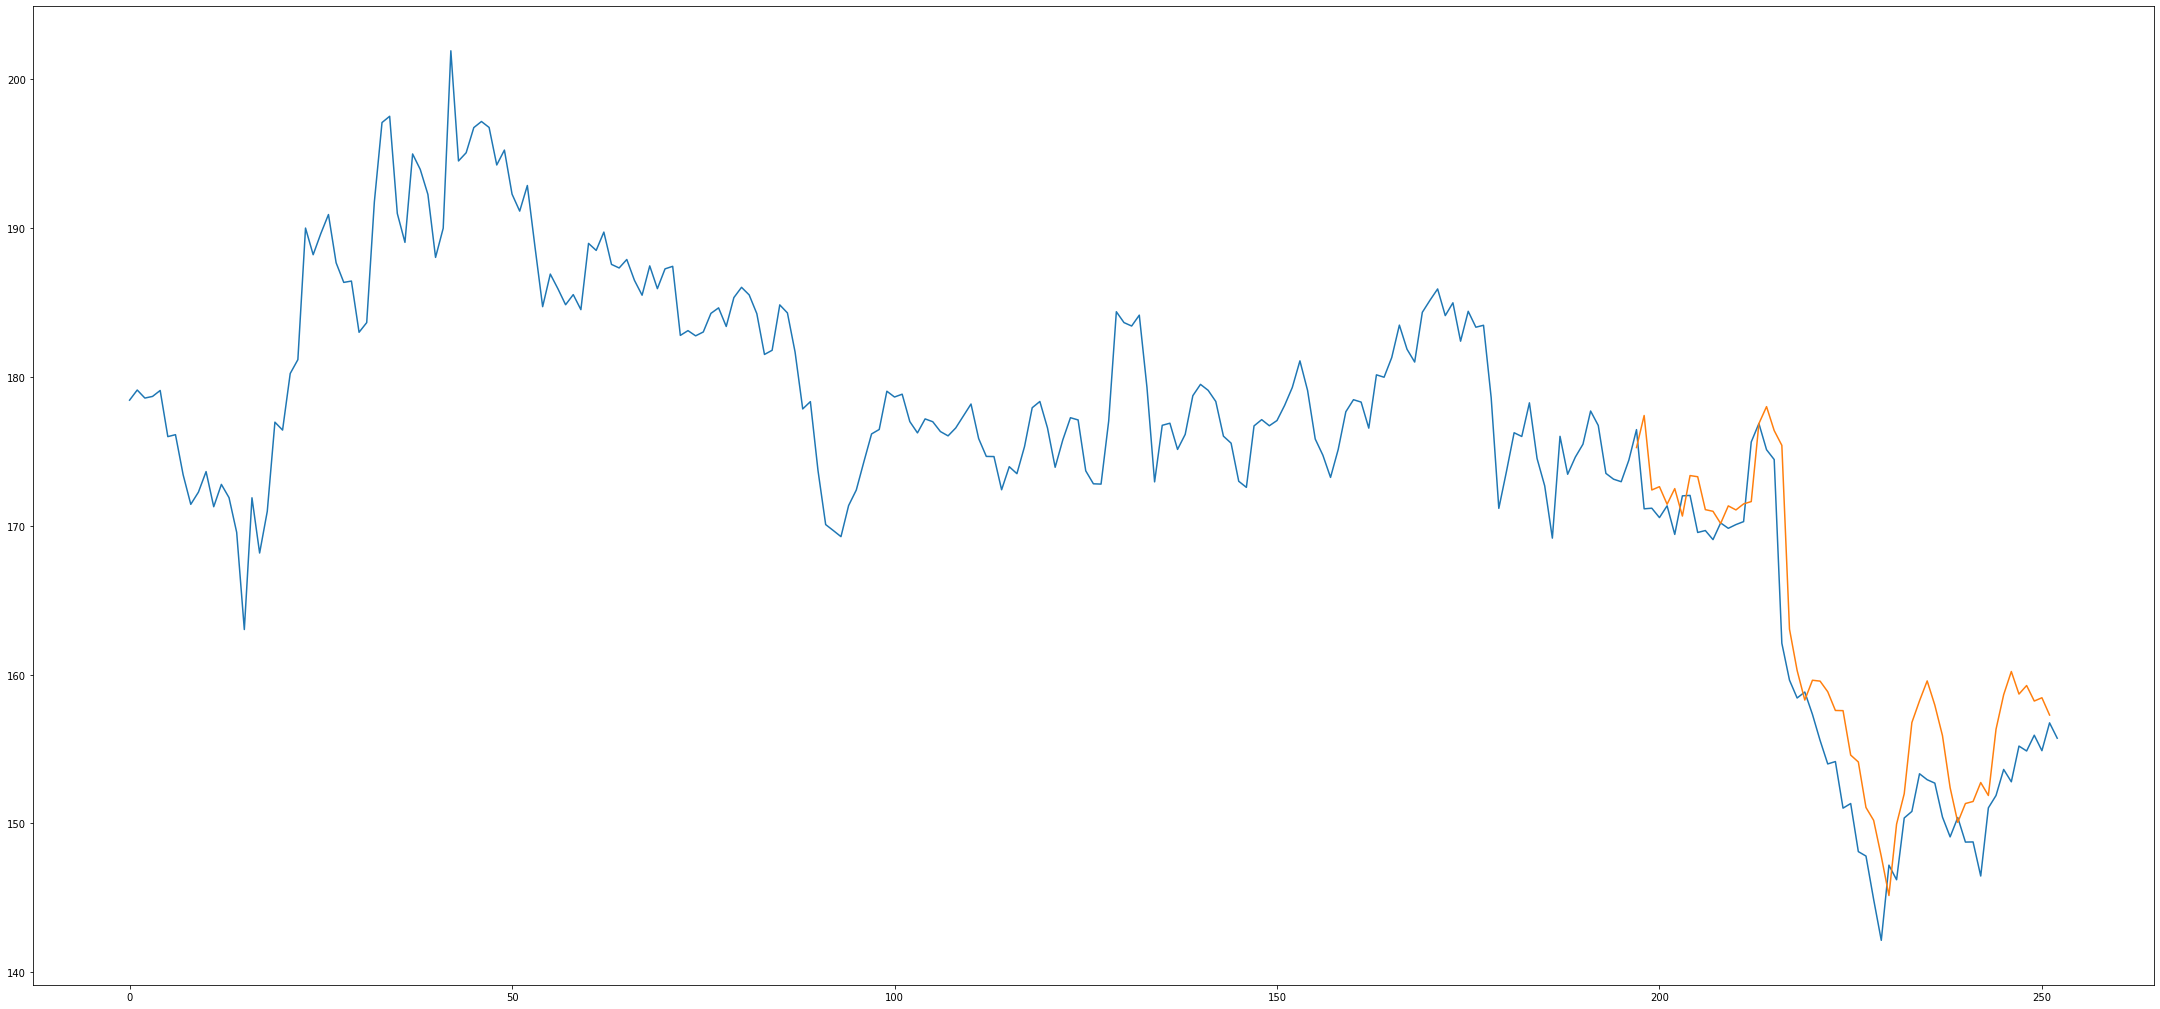

In [ ]:
predictPlot = np.empty_like(data)
predictPlot[:, :] = np.nan
predictPlot[len(trainX)+(back_price*2)+1:len(data)-1, :] = prediction_inverse

plt.figure(figsize=(38,18))
plt.plot(scaler.inverse_transform(data))
plt.plot(predictPlot)
plt.show()

# **Mô hình 2**

Có 3 lớp

units = 128, 64

batch_size = 10

epochs = 100

In [ ]:
model2 = Sequential()
model2.add(LSTM(128, return_sequences = True, input_shape=(trainX.shape[1],trainX.shape[2])))
model2.add(LSTM(64, return_sequences = False))
model2.add(Dense(trainY.shape[1]))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history2 = model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1)

Epoch 1/100
16/16 [==============================] - 4s 74ms/step - loss: 0.0645 - accuracy: 0.0000e+00 - val_loss: 0.0149 - val_accuracy: 0.0182
Epoch 2/100
16/16 [==============================] - 0s 26ms/step - loss: 0.0095 - accuracy: 0.0064 - val_loss: 0.0209 - val_accuracy: 0.0182
Epoch 3/100
16/16 [==============================] - 0s 27ms/step - loss: 0.0066 - accuracy: 0.0064 - val_loss: 0.0267 - val_accuracy: 0.0182
Epoch 4/100
16/16 [==============================] - 0s 26ms/step - loss: 0.0064 - accuracy: 0.0064 - val_loss: 0.0240 - val_accuracy: 0.0182
Epoch 5/100
16/16 [==============================] - 0s 26ms/step - loss: 0.0063 - accuracy: 0.0064 - val_loss: 0.0260 - val_accuracy: 0.0182
Epoch 6/100
16/16 [==============================] - 0s 27ms/step - loss: 0.0061 - accuracy: 0.0064 - val_loss: 0.0282 - val_accuracy: 0.0182
Epoch 7/100
16/16 [==============================] - 0s 27ms/step - loss: 0.0062 - accuracy: 0.0064 - val_loss: 0.0246 - val_accuracy: 0.0182
Ep

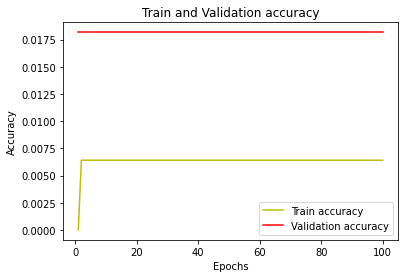

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Train accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Train and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model2.predict(testX)

prediction_inverse = scaler.inverse_transform(prediction)
testY_inverse = scaler.inverse_transform(testY)

rmseScore = math.sqrt(mean_squared_error(testY_inverse, prediction_inverse[:,0]))
print('RMSE Score: %.2f RMSE' % (rmseScore))

RMSE Score: 4.48 RMSE


# **Mô hình 3**

Có 4 lớp

units = 128, 64

batch_size = 1

epochs = 100

In [ ]:
model3 = Sequential()
model3.add(LSTM(128, return_sequences = True, input_shape=(trainX.shape[1],trainX.shape[2])))
model3.add(LSTM(64, return_sequences = False))
model3.add(Dense(5))
model3.add(Dense(trainY.shape[1]))

model3.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history3 = model3.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=1, verbose=1)

Epoch 1/100
156/156 [==============================] - 5s 16ms/step - loss: 0.0194 - accuracy: 0.0064 - val_loss: 0.0302 - val_accuracy: 0.0182
Epoch 2/100
156/156 [==============================] - 2s 11ms/step - loss: 0.0079 - accuracy: 0.0064 - val_loss: 0.0258 - val_accuracy: 0.0182
Epoch 3/100
156/156 [==============================] - 2s 12ms/step - loss: 0.0072 - accuracy: 0.0064 - val_loss: 0.0268 - val_accuracy: 0.0182
Epoch 4/100
156/156 [==============================] - 2s 12ms/step - loss: 0.0054 - accuracy: 0.0064 - val_loss: 0.0119 - val_accuracy: 0.0182
Epoch 5/100
156/156 [==============================] - 2s 12ms/step - loss: 0.0057 - accuracy: 0.0064 - val_loss: 0.0234 - val_accuracy: 0.0182
Epoch 6/100
156/156 [==============================] - 2s 11ms/step - loss: 0.0054 - accuracy: 0.0064 - val_loss: 0.0146 - val_accuracy: 0.0182
Epoch 7/100
156/156 [==============================] - 2s 12ms/step - loss: 0.0045 - accuracy: 0.0064 - val_loss: 0.0129 - val_accuracy:

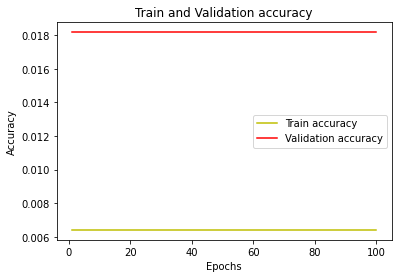

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Train accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Train and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model3.predict(testX)

prediction_inverse = scaler.inverse_transform(prediction)
testY_inverse = scaler.inverse_transform(testY)

rmseScore = math.sqrt(mean_squared_error(testY_inverse, prediction_inverse[:,0]))
print('RMSE Score: %.2f RMSE' % (rmseScore))

RMSE Score: 7.63 RMSE


# **Mô hình 4**

Có 4 lớp

units = 64, 32, 16

batch_size = 10

epochs = 100

In [ ]:
model4 = Sequential()
model4.add(LSTM(64, return_sequences = True, input_shape=(trainX.shape[1],trainX.shape[2])))
model4.add(LSTM(32, return_sequences = True))
model4.add(LSTM(16, return_sequences = False))
model4.add(Dense(trainY.shape[1]))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history4 = model4.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1)

Epoch 1/100
16/16 [==============================] - 6s 93ms/step - loss: 0.1378 - accuracy: 0.0000e+00 - val_loss: 0.0774 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 24ms/step - loss: 0.0137 - accuracy: 0.0064 - val_loss: 0.0599 - val_accuracy: 0.0182
Epoch 3/100
16/16 [==============================] - 0s 24ms/step - loss: 0.0103 - accuracy: 0.0064 - val_loss: 0.0517 - val_accuracy: 0.0182
Epoch 4/100
16/16 [==============================] - 0s 25ms/step - loss: 0.0093 - accuracy: 0.0064 - val_loss: 0.0614 - val_accuracy: 0.0182
Epoch 5/100
16/16 [==============================] - 0s 25ms/step - loss: 0.0092 - accuracy: 0.0064 - val_loss: 0.0634 - val_accuracy: 0.0182
Epoch 6/100
16/16 [==============================] - 0s 24ms/step - loss: 0.0089 - accuracy: 0.0064 - val_loss: 0.0495 - val_accuracy: 0.0182
Epoch 7/100
16/16 [==============================] - 0s 24ms/step - loss: 0.0087 - accuracy: 0.0064 - val_loss: 0.0482 - val_accuracy: 0.018

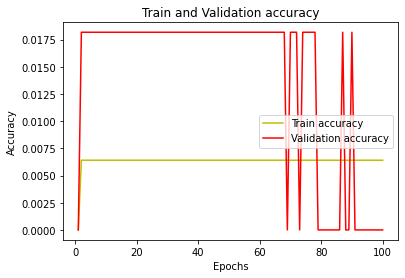

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Train accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Train and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model4.predict(testX)

prediction_inverse = scaler.inverse_transform(prediction)
testY_inverse = scaler.inverse_transform(testY)

rmseScore = math.sqrt(mean_squared_error(testY_inverse, prediction_inverse[:,0]))
print('RMSE Score: %.2f RMSE' % (rmseScore))

RMSE Score: 20.56 RMSE


# **Mô hình 5**

Có 4 lớp

units = 128, 64, 32, 16

batch_size = 1

epochs = 50

In [ ]:
model5 = Sequential()
model5.add(LSTM(64, return_sequences = True, input_shape=(trainX.shape[1],trainX.shape[2])))
model5.add(LSTM(32, return_sequences = True))
model5.add(LSTM(16, return_sequences = False))
model5.add(Dense(trainY.shape[1]))

model5.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history5 = model5.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=1, verbose=1)

Epoch 1/50
156/156 [==============================] - 7s 20ms/step - loss: 0.0230 - accuracy: 0.0064 - val_loss: 0.0541 - val_accuracy: 0.0182
Epoch 2/50
156/156 [==============================] - 2s 14ms/step - loss: 0.0098 - accuracy: 0.0064 - val_loss: 0.0335 - val_accuracy: 0.0182
Epoch 3/50
156/156 [==============================] - 2s 14ms/step - loss: 0.0085 - accuracy: 0.0064 - val_loss: 0.0309 - val_accuracy: 0.0182
Epoch 4/50
156/156 [==============================] - 2s 14ms/step - loss: 0.0086 - accuracy: 0.0064 - val_loss: 0.0425 - val_accuracy: 0.0182
Epoch 5/50
156/156 [==============================] - 2s 14ms/step - loss: 0.0073 - accuracy: 0.0064 - val_loss: 0.0412 - val_accuracy: 0.0182
Epoch 6/50
156/156 [==============================] - 2s 13ms/step - loss: 0.0088 - accuracy: 0.0064 - val_loss: 0.0390 - val_accuracy: 0.0182
Epoch 7/50
156/156 [==============================] - 2s 13ms/step - loss: 0.0072 - accuracy: 0.0064 - val_loss: 0.0472 - val_accuracy: 0.0182

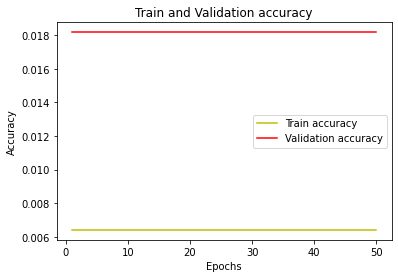

In [ ]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Train accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Train and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model5.predict(testX)

prediction_inverse = scaler.inverse_transform(prediction)
testY_inverse = scaler.inverse_transform(testY)

rmseScore = math.sqrt(mean_squared_error(testY_inverse, prediction_inverse[:,0]))
print('RMSE Score: %.2f RMSE' % (rmseScore))

RMSE Score: 6.22 RMSE


# **Dự đoán Giá đóng cửa tương lai**

Lấy 20 giá trị cuối

In [ ]:
x_input = test[len(test)-back_price:].reshape(1,-1)
x_input.shape

(1, 20)

Chuyển về dạng list

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.14491302795966732,
 0.1872489981176373,
 0.1805556592109001,
 0.17670701527660393,
 0.13855417694876548,
 0.11629870878535664,
 0.13805218573423916,
 0.11044184898898113,
 0.11060910130369805,
 0.07228926166511673,
 0.14892917521265492,
 0.1628180952446292,
 0.1921018922185591,
 0.17821297218658438,
 0.2183735076349551,
 0.212851386738389,
 0.2305889674382584,
 0.2131861256381984,
 0.24447788747023314,
 0.2272422979848896]

Dự đoán 30 ngày trong tương lai

In [ ]:
from numpy import array

output = []
shape = back_price
i = 0
while(i<30):
  x_input = np.array(temp_input[:])
  x_input = x_input.reshape(1,-1)
  x_input = x_input.reshape((1, shape, 1))
  ypred = model1.predict(x_input, verbose=0)
  temp_input.extend(ypred[0].tolist())
  output.extend(ypred.tolist())
  temp_input.pop(0)
  i = i + 1

print(output)

[[0.2748587131500244], [0.32411524653434753], [0.38453876972198486], [0.4515094459056854], [0.5153676271438599], [0.5669501423835754], [0.6010738611221313], [0.6183354258537292], [0.6243759393692017], [0.6258205771446228], [0.6280121803283691], [0.6335613131523132], [0.6431747078895569], [0.6560099124908447], [0.6704095005989075], [0.6845343708992004], [0.6969821453094482], [0.7070311903953552], [0.7146328091621399], [0.7202157378196716], [0.7244090437889099], [0.7278444766998291], [0.7309993505477905], [0.7341528534889221], [0.7374073266983032], [0.7407362461090088], [0.7440460324287415], [0.7472288608551025], [0.750199019908905], [0.7529093623161316]]


Thể hiện dự đoán ở biểu đồ

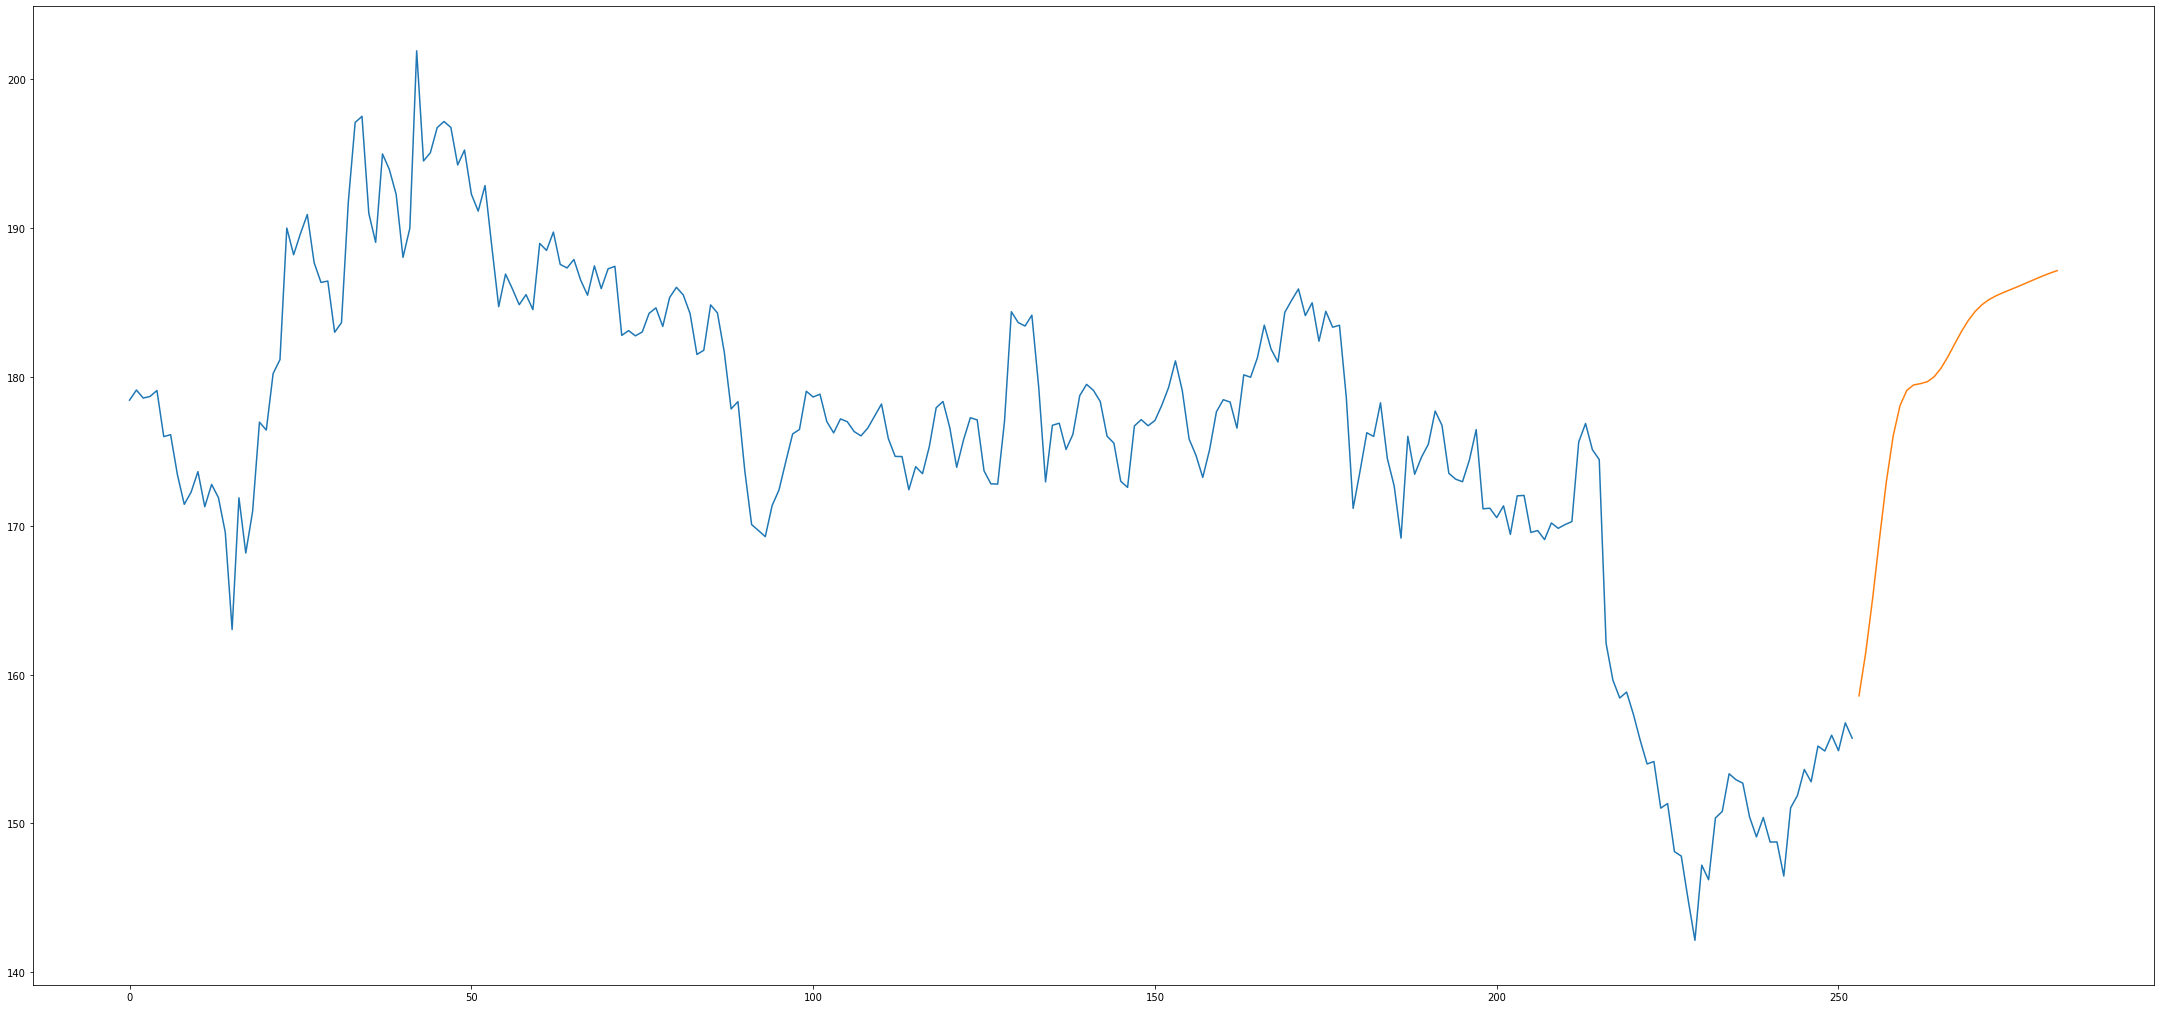

In [ ]:
plt.figure(figsize=(38,18))
plt.plot(np.arange(0,len(data)),scaler.inverse_transform(data[:]))
plt.plot(np.arange(len(data),len(data) + 30),scaler.inverse_transform(output))